# **0. Introduction**
This notebook create different pipelines for machine learning models

In [11]:
# Import libraries 

# Data Manipulation
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.feature_extraction import FeatureHasher
from sklearn.compose import ColumnTransformer

# Data splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Feature Selection
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Models
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor , AdaBoostRegressor , BaggingRegressor
from sklearn.tree import DecisionTreeRegressor , ExtraTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Feature Selection
from xgboost import XGBClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFECV , RFE
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_regression

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV

# Data imputation
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Feature importance
import shap

# Genetic Algorithm
from deap import base, creator, tools, algorithms

# Utils
from itertools import product
import json
import time
import warnings
import pickle
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d
import pickle as pkl
from sklearn.pipeline import Pipeline , make_pipeline
import random
import joblib
warnings.filterwarnings("ignore")
# Set Numpy Seed
np.random.seed(0)
#plt.style.use('ggplot')
print('Libraries imported.')

Libraries imported.


# **1. Cargar información y preprocesamiento básico**

In [2]:
# Cargar información
ruta_archivo = r'..\data'
nombre_archivo = '\Resultados__nicos_Saber_Pro_20231019.csv'
tipo_de_dato = {'ESTU_CODDANE_COLE_TERMINO' : str}
data_1 = pd.read_csv(ruta_archivo + nombre_archivo).reset_index(drop = True)
# Dejar solo los resultados del programa de ingeniería industrial
filtro_academico = ['INGENIERIA INDUSTRIAL','INGENIERÍA INDUSTRIAL']
data_1 = data_1[data_1['ESTU_PRGM_ACADEMICO'].isin(filtro_academico)]
data_1

,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,...,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
44,20183,EK201830190681,CC,COLOMBIA,76.0,VALLE,76001.0,CALI,NaN,NaN,...,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,193,153.0,3.0,B1,178,195.0,182
70,20183,EK201830032031,CC,COLOMBIA,66.0,RISARALDA,66170.0,DOSQUEBRADAS,NaN,NaN,...,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - FUNDACIÓN,180,146.0,2.0,A2,158,170.0,149
82,20183,EK201830091447,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,1.251750e+11,25175.0,...,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,145,140.0,2.0,A1,146,127.0,178
83,20183,EK201830118961,CC,COLOMBIA,5.0,ANTIOQUIA,5001.0,MEDELLÍN,3.052660e+11,5266.0,...,NaN,NaN,NO OFICIAL - CORPORACIÓN,186,148.0,2.0,B2,190,214.0,135
143,20183,EK201830002494,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.080010e+11,8001.0,...,Si,Educación profesional completa,NO OFICIAL - CORPORACIÓN,217,199.0,4.0,B2,217,209.0,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217384,20222,EK202220137067,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.110010e+11,11001.0,...,Si,Educación profesional completa,NO OFICIAL - FUNDACIÓN,203,128.0,2.0,B1,189,186.0,152
1217420,20222,EK202220199089,CC,COLOMBIA,76.0,VALLE,76834.0,TULUÁ,NaN,NaN,...,Si,Ninguno,NO OFICIAL - FUNDACIÓN,137,0.0,NaN,A2,145,141.0,163
1217429,20222,EK202220124056,CC,COLOMBIA,41.0,HUILA,41306.0,GIGANTE,2.413060e+11,41306.0,...,Si,Postgrado,NO OFICIAL - CORPORACIÓN,162,133.0,2.0,B1,128,168.0,178
1217455,20222,EK202220205637,CC,COLOMBIA,25.0,CUNDINAMARCA,25785.0,TABIO,NaN,NaN,...,Si,Primaria incompleta,NO OFICIAL - FUNDACIÓN,107,107.0,1.0,A1,77,120.0,127


In [3]:
# Definir las columnas de los puntajes
columnas_puntajes = ['MOD_RAZONA_CUANTITAT_PUNT',
                     'MOD_COMUNI_ESCRITA_PUNT',
                     'MOD_INGLES_PUNT',
                     'MOD_LECTURA_CRITICA_PUNT',
                     'MOD_COMPETEN_CIUDADA_PUNT']
# Quitar los valores nulos de las columnas de puntaje
data = data_1.copy()
for i in columnas_puntajes:
    data = data[data[i].isnull() == False]
data

,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,...,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
44,20183,EK201830190681,CC,COLOMBIA,76.0,VALLE,76001.0,CALI,NaN,NaN,...,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,193,153.0,3.0,B1,178,195.0,182
70,20183,EK201830032031,CC,COLOMBIA,66.0,RISARALDA,66170.0,DOSQUEBRADAS,NaN,NaN,...,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - FUNDACIÓN,180,146.0,2.0,A2,158,170.0,149
82,20183,EK201830091447,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,1.251750e+11,25175.0,...,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,145,140.0,2.0,A1,146,127.0,178
83,20183,EK201830118961,CC,COLOMBIA,5.0,ANTIOQUIA,5001.0,MEDELLÍN,3.052660e+11,5266.0,...,NaN,NaN,NO OFICIAL - CORPORACIÓN,186,148.0,2.0,B2,190,214.0,135
143,20183,EK201830002494,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.080010e+11,8001.0,...,Si,Educación profesional completa,NO OFICIAL - CORPORACIÓN,217,199.0,4.0,B2,217,209.0,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217384,20222,EK202220137067,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.110010e+11,11001.0,...,Si,Educación profesional completa,NO OFICIAL - FUNDACIÓN,203,128.0,2.0,B1,189,186.0,152
1217420,20222,EK202220199089,CC,COLOMBIA,76.0,VALLE,76834.0,TULUÁ,NaN,NaN,...,Si,Ninguno,NO OFICIAL - FUNDACIÓN,137,0.0,NaN,A2,145,141.0,163
1217429,20222,EK202220124056,CC,COLOMBIA,41.0,HUILA,41306.0,GIGANTE,2.413060e+11,41306.0,...,Si,Postgrado,NO OFICIAL - CORPORACIÓN,162,133.0,2.0,B1,128,168.0,178
1217455,20222,EK202220205637,CC,COLOMBIA,25.0,CUNDINAMARCA,25785.0,TABIO,NaN,NaN,...,Si,Primaria incompleta,NO OFICIAL - FUNDACIÓN,107,107.0,1.0,A1,77,120.0,127


In [4]:
# Crear la columna de target como el promedio de todos los puntajes
data['PUNTAJE_GLOBAL'] = data[columnas_puntajes].mean(axis = 1)
data

,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,...,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT,PUNTAJE_GLOBAL
44,20183,EK201830190681,CC,COLOMBIA,76.0,VALLE,76001.0,CALI,NaN,NaN,...,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,193,153.0,3.0,B1,178,195.0,182,180.2
70,20183,EK201830032031,CC,COLOMBIA,66.0,RISARALDA,66170.0,DOSQUEBRADAS,NaN,NaN,...,Secundaria (Bachillerato) incompleta,NO OFICIAL - FUNDACIÓN,180,146.0,2.0,A2,158,170.0,149,160.6
82,20183,EK201830091447,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,1.251750e+11,25175.0,...,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,145,140.0,2.0,A1,146,127.0,178,147.2
83,20183,EK201830118961,CC,COLOMBIA,5.0,ANTIOQUIA,5001.0,MEDELLÍN,3.052660e+11,5266.0,...,NaN,NO OFICIAL - CORPORACIÓN,186,148.0,2.0,B2,190,214.0,135,174.6
143,20183,EK201830002494,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.080010e+11,8001.0,...,Educación profesional completa,NO OFICIAL - CORPORACIÓN,217,199.0,4.0,B2,217,209.0,217,211.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217384,20222,EK202220137067,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.110010e+11,11001.0,...,Educación profesional completa,NO OFICIAL - FUNDACIÓN,203,128.0,2.0,B1,189,186.0,152,171.6
1217420,20222,EK202220199089,CC,COLOMBIA,76.0,VALLE,76834.0,TULUÁ,NaN,NaN,...,Ninguno,NO OFICIAL - FUNDACIÓN,137,0.0,NaN,A2,145,141.0,163,117.2
1217429,20222,EK202220124056,CC,COLOMBIA,41.0,HUILA,41306.0,GIGANTE,2.413060e+11,41306.0,...,Postgrado,NO OFICIAL - CORPORACIÓN,162,133.0,2.0,B1,128,168.0,178,153.8
1217455,20222,EK202220205637,CC,COLOMBIA,25.0,CUNDINAMARCA,25785.0,TABIO,NaN,NaN,...,Primaria incompleta,NO OFICIAL - FUNDACIÓN,107,107.0,1.0,A1,77,120.0,127,107.6


In [5]:
# Mostrar columnas
data.columns.tolist()

['PERIODO',
 'ESTU_CONSECUTIVO',
 'ESTU_TIPODOCUMENTO',
 'ESTU_PAIS_RESIDE',
 'ESTU_COD_RESIDE_DEPTO',
 'ESTU_DEPTO_RESIDE',
 'ESTU_COD_RESIDE_MCPIO',
 'ESTU_MCPIO_RESIDE',
 'ESTU_CODDANE_COLE_TERMINO',
 'ESTU_COD_COLE_MCPIO_TERMINO',
 'ESTU_COD_DEPTO_PRESENTACION',
 'INST_COD_INSTITUCION',
 'INST_NOMBRE_INSTITUCION',
 'INST_CARACTER_ACADEMICO',
 'ESTU_NUCLEO_PREGRADO',
 'ESTU_INST_DEPARTAMENTO',
 'ESTU_INST_CODMUNICIPIO',
 'ESTU_INST_MUNICIPIO',
 'ESTU_PRGM_ACADEMICO',
 'ESTU_PRGM_DEPARTAMENTO',
 'ESTU_PRGM_CODMUNICIPIO',
 'ESTU_PRGM_MUNICIPIO',
 'ESTU_NIVEL_PRGM_ACADEMICO',
 'ESTU_METODO_PRGM',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_DEPTO_PRESENTACION',
 'ESTU_COD_MCPIO_PRESENTACION',
 'ESTU_MCPIO_PRESENTACION',
 'ESTU_PAGOMATRICULABECA',
 'ESTU_PAGOMATRICULACREDITO',
 'ESTU_HORASSEMANATRABAJA',
 'ESTU_SNIES_PRGMACADEMICO',
 'ESTU_PRIVADO_LIBERTAD',
 'ESTU_NACIONALIDAD',
 'ESTU_ESTUDIANTE',
 'ESTU_GENERO',
 'ESTU_COLE_TERMINO',
 'ESTU_PAGOMATRICULAPADRES',
 'ESTU_ESTADOINVESTIGACI

In [6]:
# Mostrar el número de instituciones por año, evaluadas.
aux_periodos = pd.DataFrame()
for i in data['PERIODO'].unique().tolist():
    aux = pd.DataFrame({'Periodo' : [str(i)[:4]  + str(i)[-1:].zfill(2)],
                        'Total Instituciones' :len(data[data['PERIODO'] == i]['INST_NOMBRE_INSTITUCION'].unique().tolist())})
    aux_periodos = pd.concat([aux_periodos,
                              aux] , axis = 0)
aux_periodos.sort_values(by = 'Periodo')

,Periodo,Total Instituciones
0,201803,101
0,201804,6
0,201904,29
0,201905,105
0,201906,8
0,202002,10
0,202003,107
0,202102,111
0,202103,30
0,202202,98


In [7]:
# Definir Target y tipos de datos
target = ['PUNTAJE_GLOBAL'] +  ['MOD_RAZONA_CUANTITAT_PUNT',
                                 'MOD_COMUNI_ESCRITA_PUNT',
                                 'MOD_INGLES_PUNT',
                                 'MOD_LECTURA_CRITICA_PUNT',
                                 'MOD_COMPETEN_CIUDADA_PUNT']
ignore_columns = [ 'PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_TIPODOCUMENTO' ,'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE',
                  'ESTU_COD_COLE_MCPIO_TERMINO', 'INST_NOMBRE_INSTITUCION' ,'ESTU_NUCLEO_PREGRADO' , 'ESTU_INST_DEPARTAMENTO' , 'ESTU_INST_CODMUNICIPIO',
                  'ESTU_INST_MUNICIPIO' , 'ESTU_PRGM_DEPARTAMENTO' , 'ESTU_PRGM_CODMUNICIPIO' , 'ESTU_PRGM_MUNICIPIO' , 'ESTU_DEPTO_PRESENTACION' , 'ESTU_COD_MCPIO_PRESENTACION',
                  'ESTU_MCPIO_PRESENTACION' , 'ESTU_NACIONALIDAD' , 'ESTU_ESTUDIANTE' , 'ESTU_COLE_TERMINO' , 'ESTU_TIPODOCUMENTOSB11' , 'ESTU_FECHANACIMIENTO',
                  'ESTU_CODDANE_COLE_TERMINO' , 'MOD_INGLES_DESEM' , 'ESTU_NIVEL_PRGM_ACADEMICO' , 'ESTU_PRIVADO_LIBERTAD' , 'MOD_COMUNI_ESCRITA_DESEM',
                 'ESTU_COD_RESIDE_MCPIO' , 'ESTU_PRGM_ACADEMICO', 'ESTU_SNIES_PRGMACADEMICO']
ordinal_features = ['ESTU_VALORMATRICULAUNIVERSIDAD' , 'ESTU_HORASSEMANATRABAJA' , 'FAMI_ESTRATOVIVIENDA',
                   'FAMI_EDUCACIONPADRE' , 'FAMI_EDUCACIONMADRE']
numeric_features = []
categorical_features = [i for i in data.columns.tolist() if i not in target and i not in numeric_features and i not in ignore_columns and i not in ordinal_features]
categorical_features

['ESTU_COD_RESIDE_DEPTO',
 'ESTU_COD_DEPTO_PRESENTACION',
 'INST_COD_INSTITUCION',
 'INST_CARACTER_ACADEMICO',
 'ESTU_METODO_PRGM',
 'ESTU_PAGOMATRICULABECA',
 'ESTU_PAGOMATRICULACREDITO',
 'ESTU_GENERO',
 'ESTU_PAGOMATRICULAPADRES',
 'ESTU_ESTADOINVESTIGACION',
 'ESTU_PAGOMATRICULAPROPIO',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEINTERNET',
 'INST_ORIGEN']

# **2. Exploración de datos**

In [8]:
# Quitar las columnas que se ignoran
data = data.drop(columns = ignore_columns)

In [9]:
# Describe data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61021 entries, 44 to 1217466
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_COD_RESIDE_DEPTO           60882 non-null  float64
 1   ESTU_COD_DEPTO_PRESENTACION     61020 non-null  float64
 2   INST_COD_INSTITUCION            61021 non-null  int64  
 3   INST_CARACTER_ACADEMICO         61021 non-null  object 
 4   ESTU_METODO_PRGM                61021 non-null  object 
 5   ESTU_VALORMATRICULAUNIVERSIDAD  60403 non-null  object 
 6   ESTU_PAGOMATRICULABECA          60388 non-null  object 
 7   ESTU_PAGOMATRICULACREDITO       60390 non-null  object 
 8   ESTU_HORASSEMANATRABAJA         58602 non-null  object 
 9   ESTU_GENERO                     61016 non-null  object 
 10  ESTU_PAGOMATRICULAPADRES        60387 non-null  object 
 11  ESTU_ESTADOINVESTIGACION        61021 non-null  object 
 12  ESTU_PAGOMATRICULAPROPIO     

In [10]:
data.describe()

,ESTU_COD_RESIDE_DEPTO,ESTU_COD_DEPTO_PRESENTACION,INST_COD_INSTITUCION,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT,PUNTAJE_GLOBAL
count,60882.000000,61020.000000,61021.000000,61021.000000,61021.000000,61021.000000,61021.000000,61021.000000,61021.000000
mean,92.319651,20.284677,2499.233198,160.030039,138.621589,149.314007,157.023861,145.068911,150.011681
std,2496.917863,20.395082,1436.310905,32.217025,40.796138,30.539235,31.405383,33.302400,25.024995
min,0.000000,0.000000,1101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,11.000000,1713.000000,139.000000,124.000000,127.000000,136.000000,122.000000,133.400000
50%,13.000000,11.000000,2102.000000,161.000000,140.000000,150.000000,155.000000,147.000000,149.400000
75%,54.000000,13.000000,2823.000000,183.000000,164.000000,171.000000,177.000000,169.000000,167.000000
max,99999.000000,99.000000,9914.000000,300.000000,300.000000,300.000000,300.000000,300.000000,264.800000


In [11]:
# Mostrar valores nulos
null_values_count = pd.DataFrame(data.isnull().sum() / data.shape[0]).sort_values(by = 0 , ascending = False).T
null_values_count = null_values_count.T.reset_index()
null_values_count.columns = ['Variable' , '% de nulos']
null_values_count.index = null_values_count['Variable']
null_values_count = null_values_count.drop(columns = ['Variable'])
null_values_count['% de nulos'] = round(null_values_count['% de nulos'] * 100 , 2)
null_values_count

,% de nulos
Variable,
FAMI_TIENEAUTOMOVIL,5.64
FAMI_TIENELAVADORA,5.00
FAMI_TIENECOMPUTADOR,4.74
ESTU_HORASSEMANATRABAJA,3.96
FAMI_ESTRATOVIVIENDA,3.82
FAMI_TIENEINTERNET,3.35
FAMI_EDUCACIONMADRE,2.92
FAMI_EDUCACIONPADRE,2.84
ESTU_PAGOMATRICULAPADRES,1.04


In [12]:
# Quitar categorias con más del 10% de nans
to_drop_features = [i for i in null_values_count.T.columns.tolist() if null_values_count.T[i].values[0] > 10]
data = data.drop(columns = to_drop_features)
# Re definir variables
categorical_features = [i for i in categorical_features if i in data.columns.tolist()]
numeric_features = [i for i in numeric_features if i in data.columns.tolist()]
print('Variables Eliminadas:')
to_drop_features

Variables Eliminadas:


[]

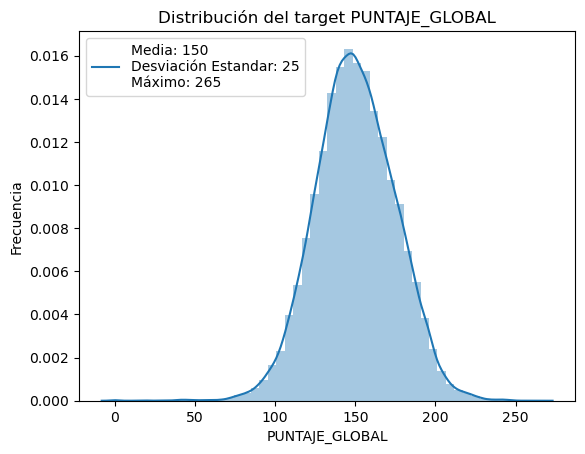

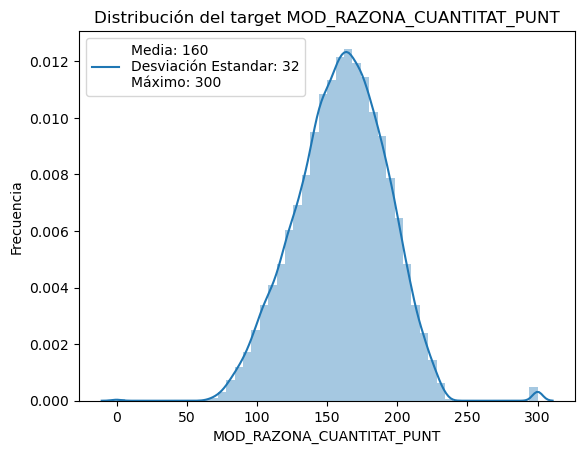

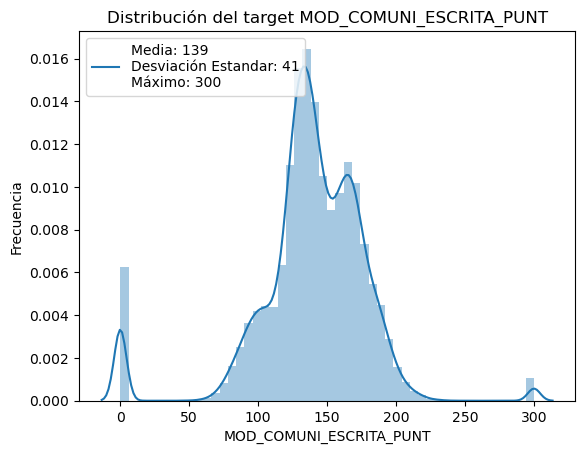

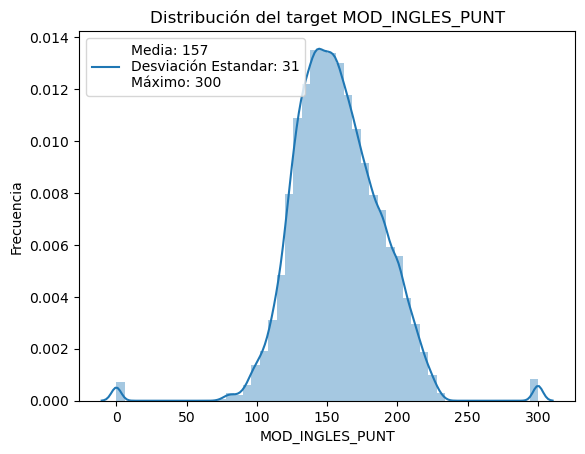

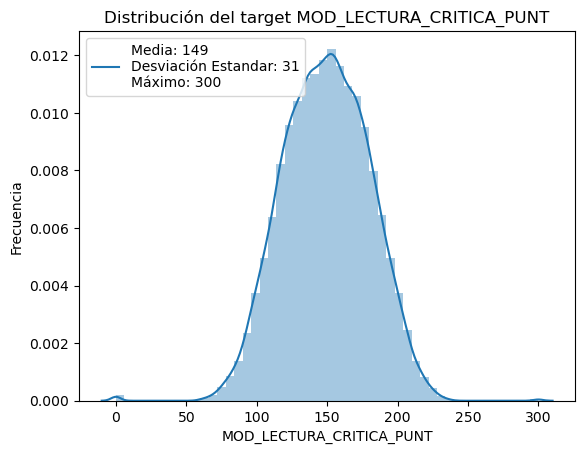

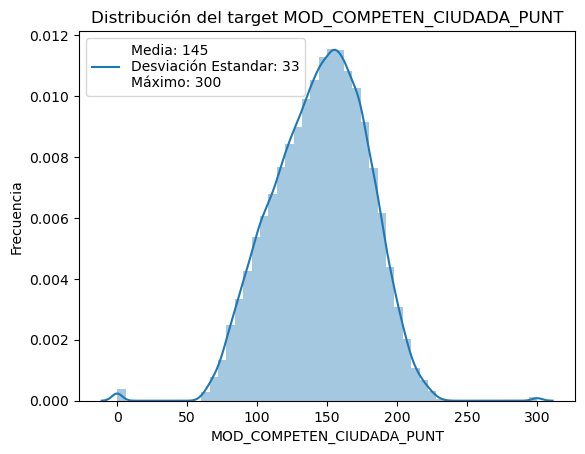

In [18]:
# Mostrar distribución del target
for i in target:
    plt.figure()
    sns.distplot(data[i])
    plt.title('Distribución del target ' + str(i))
    plt.legend([f'Media: {round(data[i].values.mean())}\nDesviación Estandar: {round(data[i].values.std())}\nMáximo: {round(data[i].values.max())}'], loc='upper left')
    plt.ylabel('Frecuencia')
    plt.show()

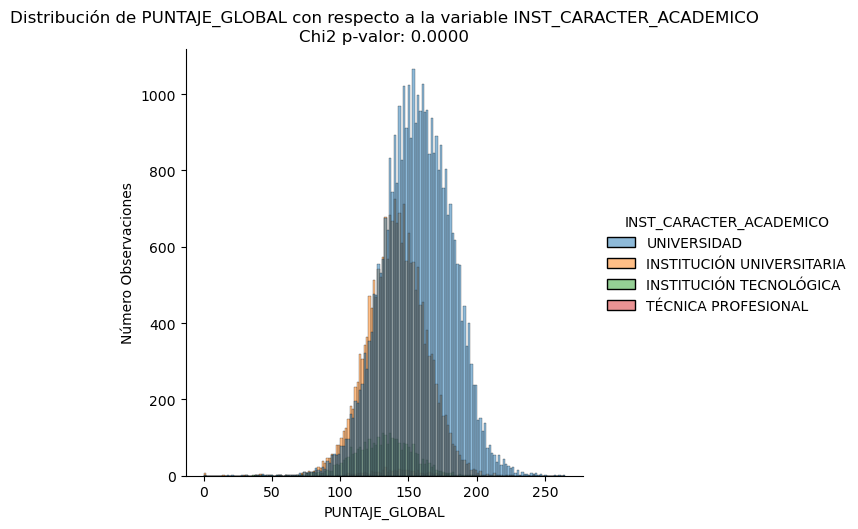

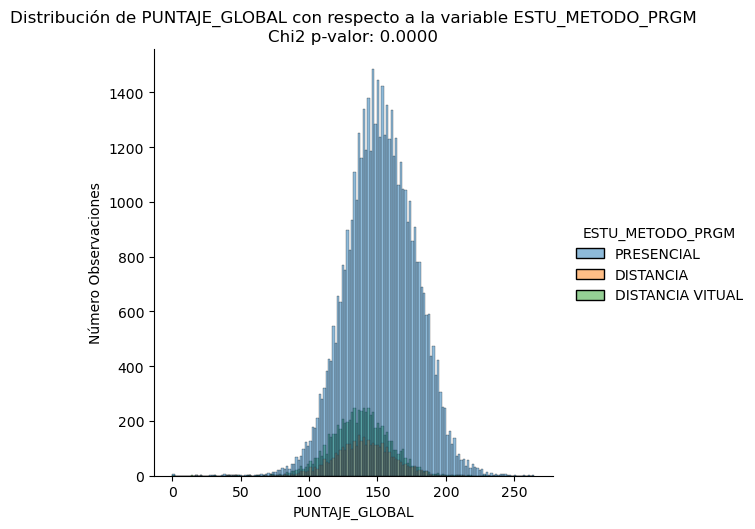

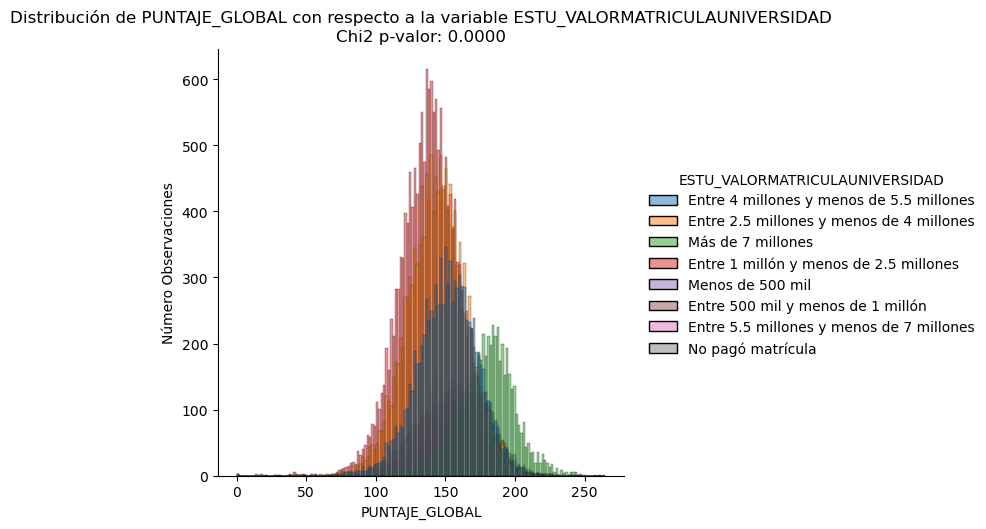

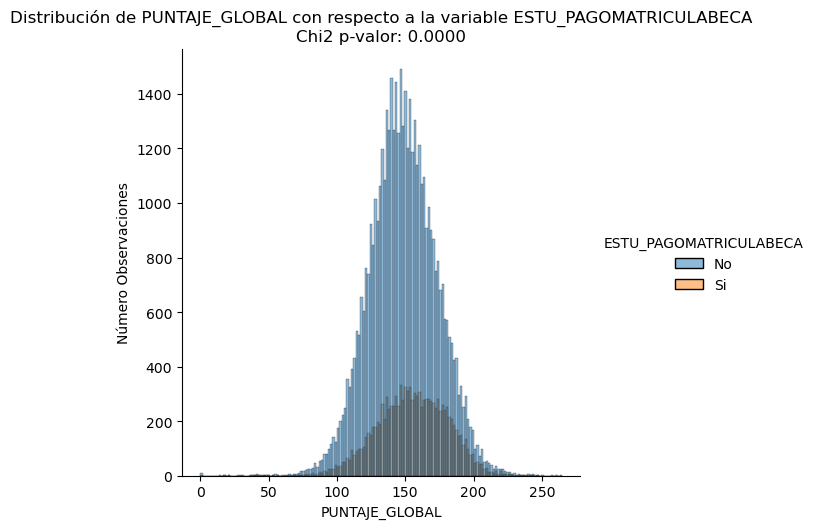

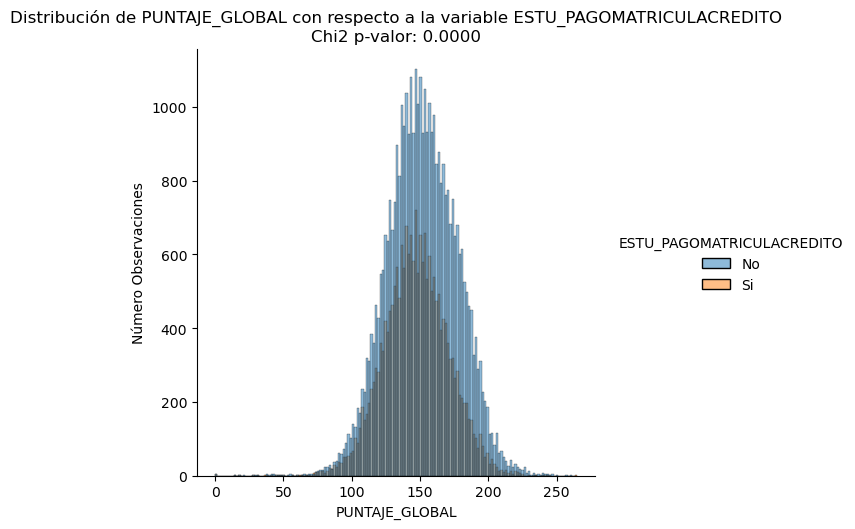

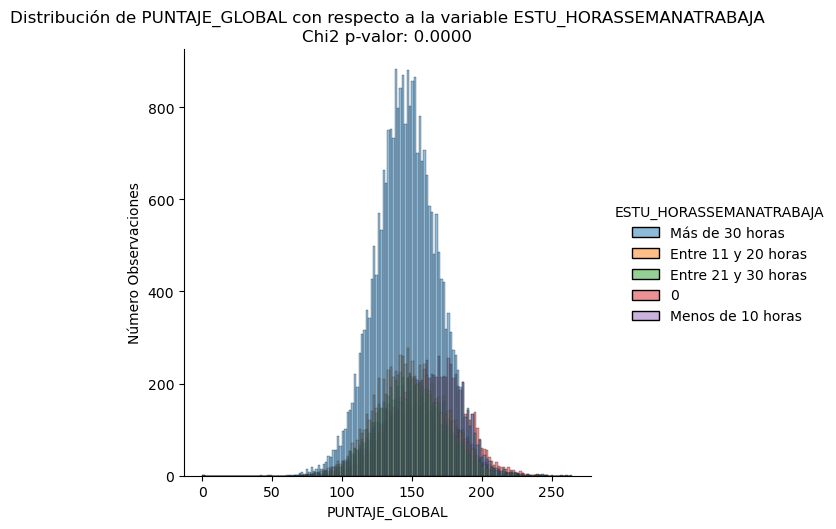

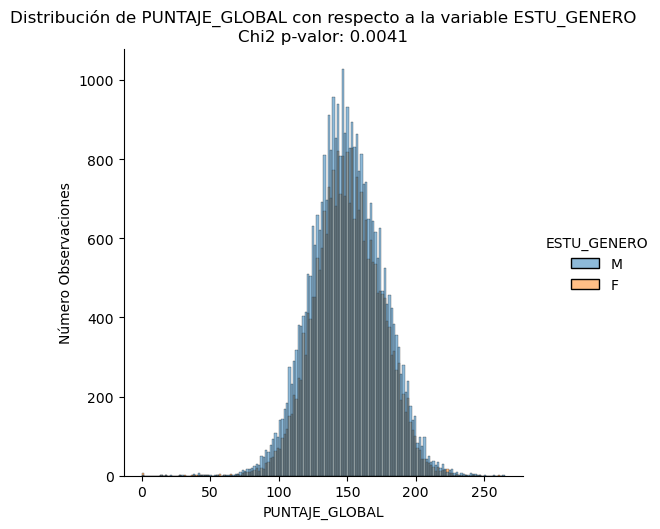

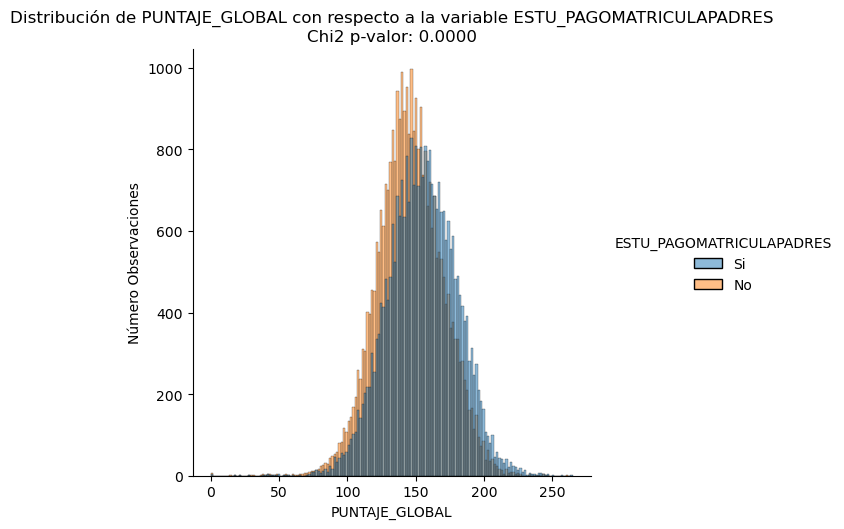

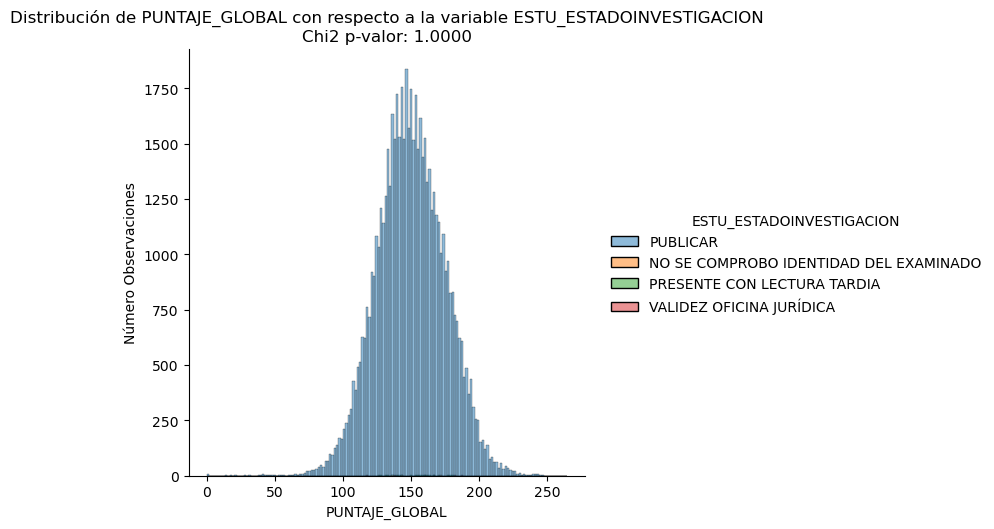

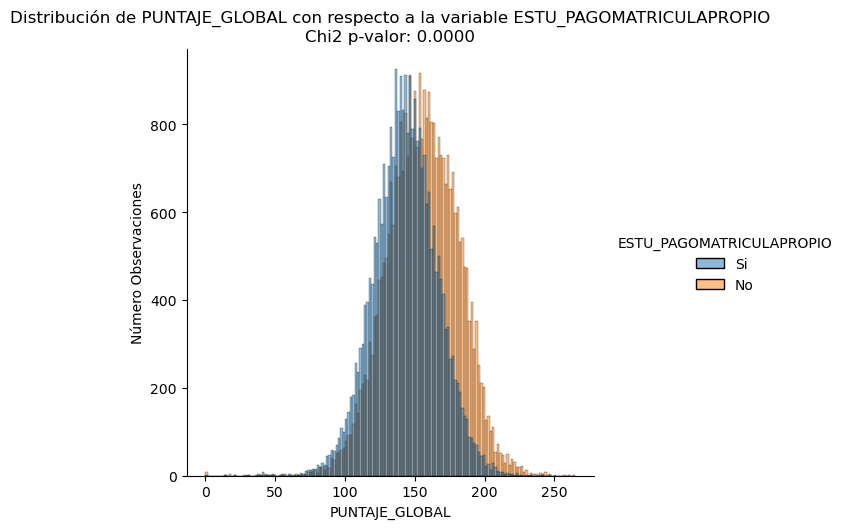

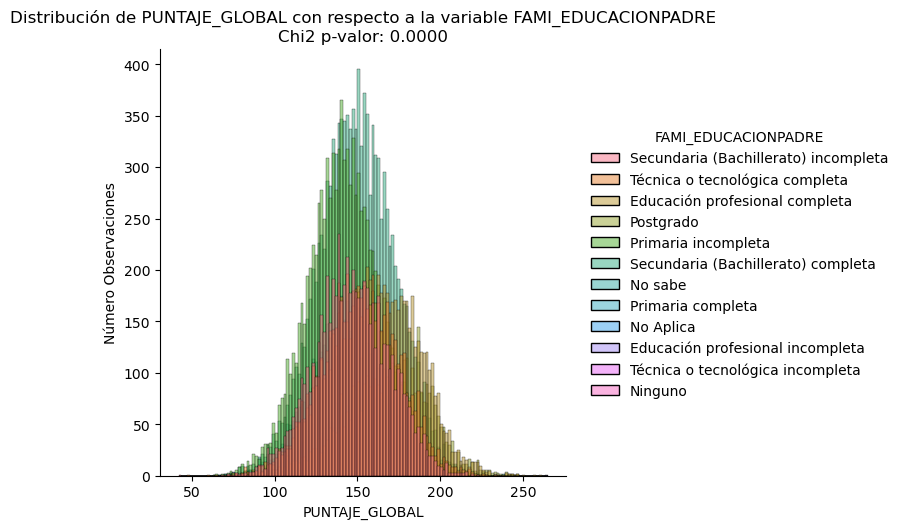

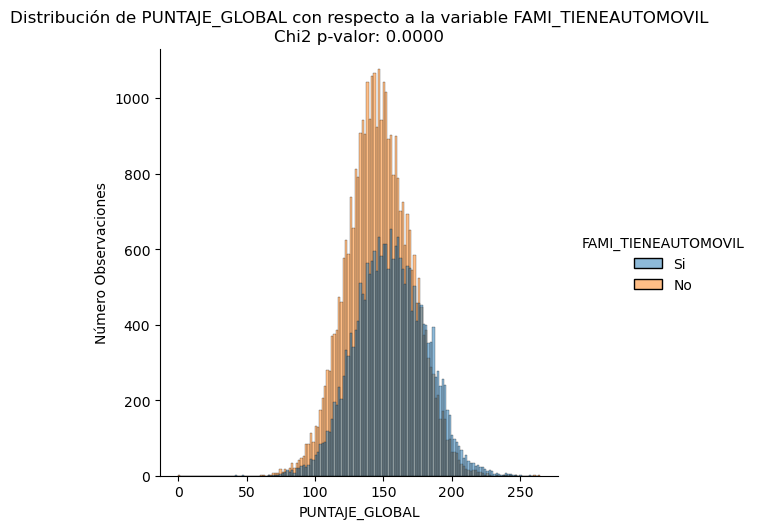

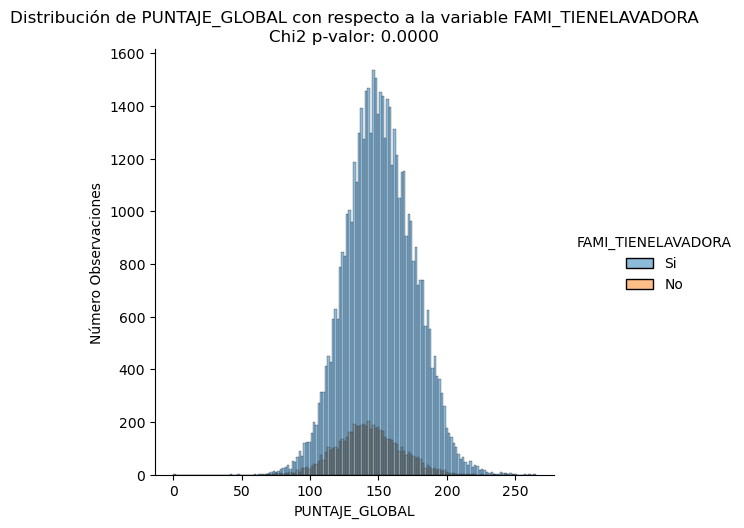

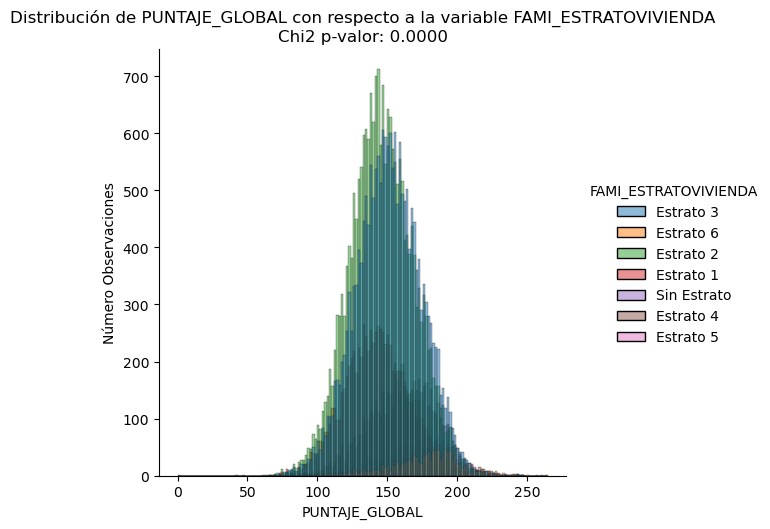

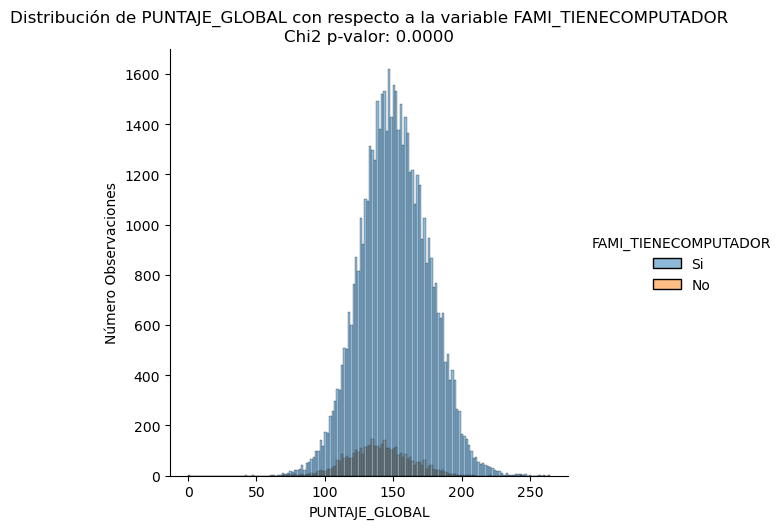

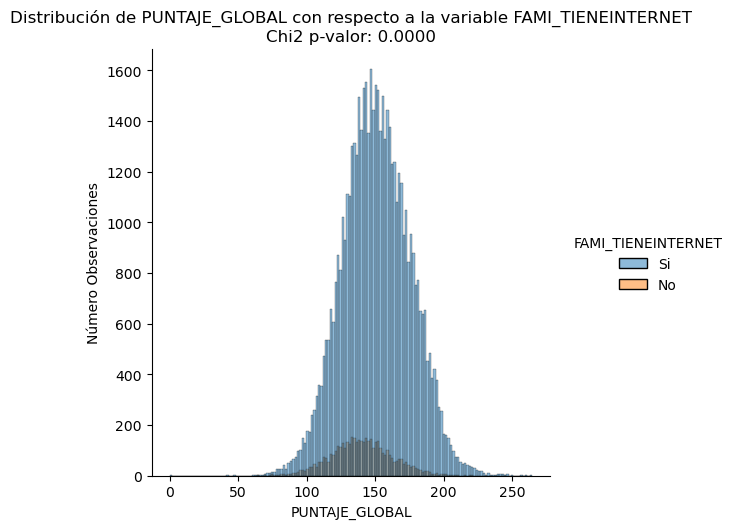

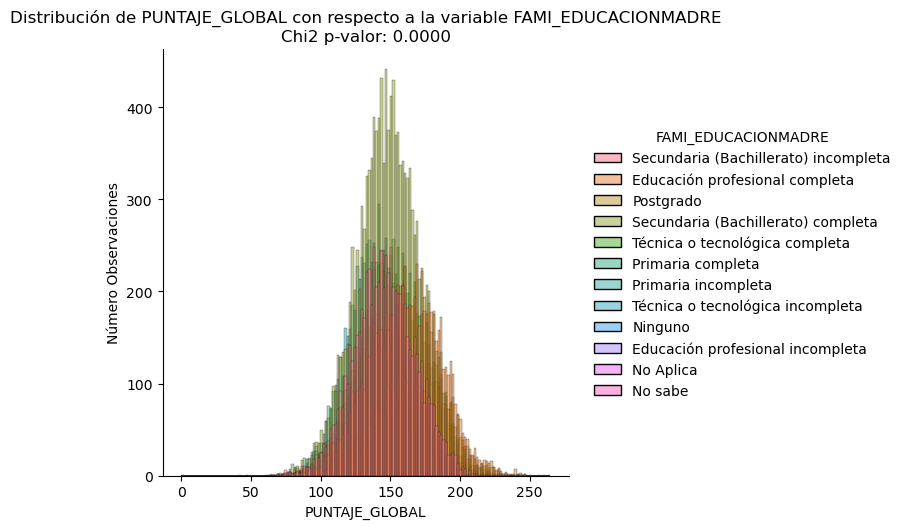

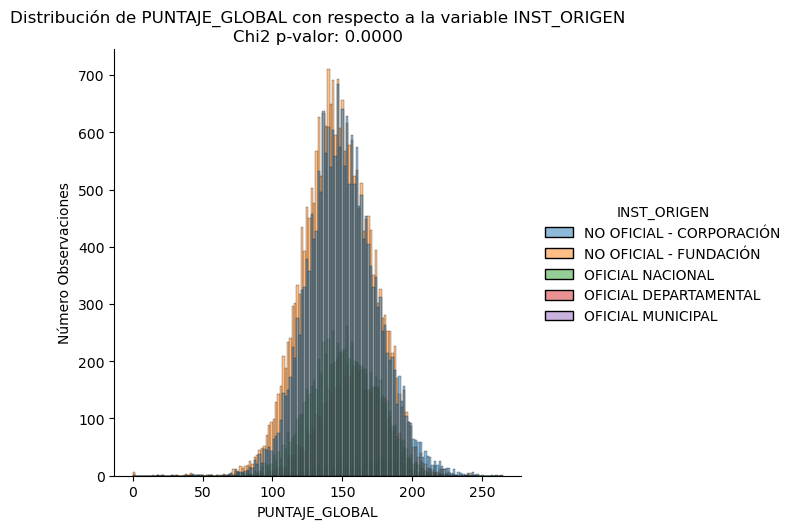

In [20]:
# Realizar gráfico de distribución del target por cada una de las variables categóricas y ordinales
excluir_grafico = ['ESTU_COD_RESIDE_DEPTO' , 'ESTU_COD_RESIDE_MCPIO' , 'ESTU_COD_DEPTO_PRESENTACION' , 'INST_COD_INSTITUCION' , 'ESTU_SNIES_PRGMACADEMICO',
                  'ESTU_PRGM_ACADEMICO']
for i in ['PUNTAJE_GLOBAL']:
    for j in data.columns.tolist():
        if j not in numeric_features and j not in target and j not in excluir_grafico:
            # Realizar la prueba de chi-cuadrado
            contingency_table = pd.crosstab(data[i], data[j])
            chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
            sns.displot(data, x = i, hue = j)
            plt.title(f'Distribución de {i} con respecto a la variable {j}\nChi2 p-valor: {p:.4f}')
            plt.ylabel('Número Observaciones')
            plt.show()

In [16]:
# Codificar las variables oridnales
codificador_ordinales = pd.read_excel('..\data\Parametros.xlsx' ,
                                      sheet_name = 'Codificacion_Ordinales',
                                      dtype = {'COLUMNA' : str , 
                                                'VALOR_ACTUAL' : str})
for i in ordinal_features:
    print('Categorizando variable -->' , i)
    aux = codificador_ordinales[codificador_ordinales['COLUMNA'] == i]
    data[i + '_ENCODED'] = data[i].map(dict(aux[['VALOR_ACTUAL' , 'VALOR_CODIFICADO']].values))
# Actualizar las variables ordinales
ordinal_features = [i for i in data.columns.tolist() if '_ENCODED' in i]
print('Nuevas variables oridnales:' , ordinal_features)
data

Categorizando variable --> ESTU_VALORMATRICULAUNIVERSIDAD
Categorizando variable --> ESTU_HORASSEMANATRABAJA
Categorizando variable --> FAMI_ESTRATOVIVIENDA
Categorizando variable --> FAMI_EDUCACIONPADRE
Categorizando variable --> FAMI_EDUCACIONMADRE
Nuevas variables oridnales: ['ESTU_VALORMATRICULAUNIVERSIDAD_ENCODED', 'ESTU_HORASSEMANATRABAJA_ENCODED', 'FAMI_ESTRATOVIVIENDA_ENCODED', 'FAMI_EDUCACIONPADRE_ENCODED', 'FAMI_EDUCACIONMADRE_ENCODED']


,ESTU_COD_RESIDE_DEPTO,ESTU_COD_DEPTO_PRESENTACION,INST_COD_INSTITUCION,INST_CARACTER_ACADEMICO,ESTU_METODO_PRGM,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_HORASSEMANATRABAJA,ESTU_GENERO,...,MOD_COMUNI_ESCRITA_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT,PUNTAJE_GLOBAL,ESTU_VALORMATRICULAUNIVERSIDAD_ENCODED,ESTU_HORASSEMANATRABAJA_ENCODED,FAMI_ESTRATOVIVIENDA_ENCODED,FAMI_EDUCACIONPADRE_ENCODED,FAMI_EDUCACIONMADRE_ENCODED
44,76.0,76.0,1805,UNIVERSIDAD,PRESENCIAL,Entre 4 millones y menos de 5.5 millones,No,No,Más de 30 horas,M,...,153.0,178,195.0,182,180.2,5,4,3,3,3
70,66.0,66.0,2711,UNIVERSIDAD,PRESENCIAL,Entre 4 millones y menos de 5.5 millones,Si,Si,Entre 11 y 20 horas,M,...,146.0,158,170.0,149,160.6,5,2,3,6,3
82,11.0,11.0,5802,UNIVERSIDAD,PRESENCIAL,Entre 2.5 millones y menos de 4 millones,No,No,Entre 21 y 30 horas,F,...,140.0,146,127.0,178,147.2,4,3,3,6,3
83,5.0,5.0,2813,UNIVERSIDAD,PRESENCIAL,Más de 7 millones,No,No,NaN,F,...,148.0,190,214.0,135,174.6,7,-1,-1,-1,-1
143,11.0,11.0,1813,UNIVERSIDAD,PRESENCIAL,Más de 7 millones,Si,No,0,F,...,199.0,217,209.0,217,211.8,7,0,3,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217384,11.0,11.0,1709,UNIVERSIDAD,PRESENCIAL,Entre 4 millones y menos de 5.5 millones,No,Si,0,M,...,128.0,189,186.0,152,171.6,5,0,3,8,8
1217420,76.0,76.0,2725,INSTITUCIÓN UNIVERSITARIA,DISTANCIA VITUAL,Entre 2.5 millones y menos de 4 millones,Si,Si,Entre 11 y 20 horas,F,...,0.0,145,141.0,163,117.2,4,2,2,0,0
1217429,41.0,11.0,2828,INSTITUCIÓN UNIVERSITARIA,PRESENCIAL,Entre 2.5 millones y menos de 4 millones,No,No,Entre 11 y 20 horas,M,...,133.0,128,168.0,178,153.8,4,2,2,6,9
1217455,25.0,25.0,2725,INSTITUCIÓN UNIVERSITARIA,DISTANCIA VITUAL,Entre 1 millón y menos de 2.5 millones,No,No,Más de 30 horas,F,...,107.0,77,120.0,127,107.6,3,4,2,1,1


In [17]:
# Mostrar valores variables categoricas
for i in list(data.columns):
    if i not in numeric_features and i not in target:
        print('-' * 50)
        print(f'{i :-<20} : {data[i].unique()} : Total valores unicos : {len(data[i].unique().tolist())}')

--------------------------------------------------
ESTU_COD_RESIDE_DEPTO : [7.6000e+01 6.6000e+01 1.1000e+01 5.0000e+00 6.8000e+01 2.5000e+01
 8.0000e+00 1.3000e+01 4.1000e+01 7.0000e+01 1.9000e+01 1.5000e+01
 5.0000e+01 7.3000e+01 4.7000e+01 5.2000e+01 8.1000e+01 8.6000e+01
 2.3000e+01 1.7000e+01 4.4000e+01 6.3000e+01 5.4000e+01 2.0000e+01
 9.5000e+01        nan 2.7000e+01 8.5000e+01 1.8000e+01 9.4000e+01
 8.8000e+01 9.9000e+01 9.9999e+04 9.7000e+01 9.1000e+01 0.0000e+00] : Total valores unicos : 36
--------------------------------------------------
ESTU_COD_DEPTO_PRESENTACION : [76. 66. 11.  5. 68. 25.  8. 13. 41. 70. 19. 15. 50. 73. 47.  0. 54. 86.
 23. 17. 44. 81. 95. 63. 52. 20. 85. 88. 18. 27. 99. 94. nan 91.] : Total valores unicos : 34
--------------------------------------------------
INST_COD_INSTITUCION : [1805 2711 5802 2813 1813 2847 2102 1202 1204 1709 2725 4702 3705 1710
 1719 1705 2828 2823 1301 1214 1828 2715 1111 2738 1826 1807 1818 1803
 1701 9119 2301 1203 1716 2810


------------------------------------



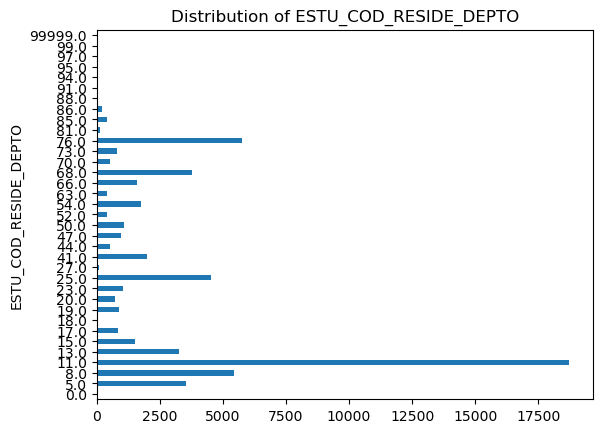


------------------------------------



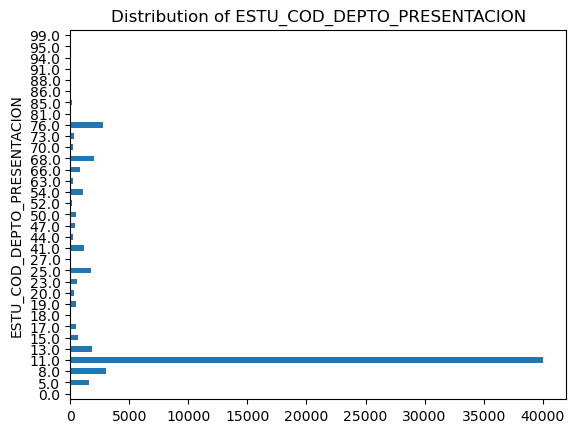


------------------------------------



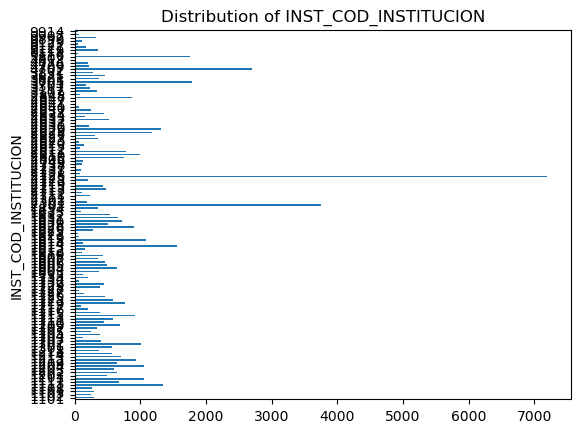


------------------------------------



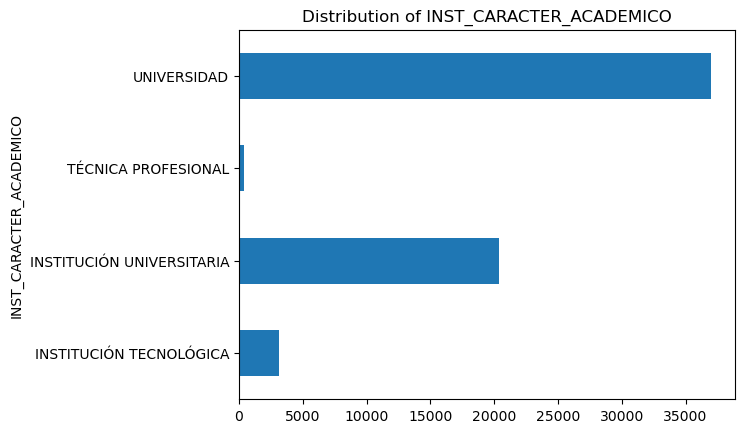


------------------------------------



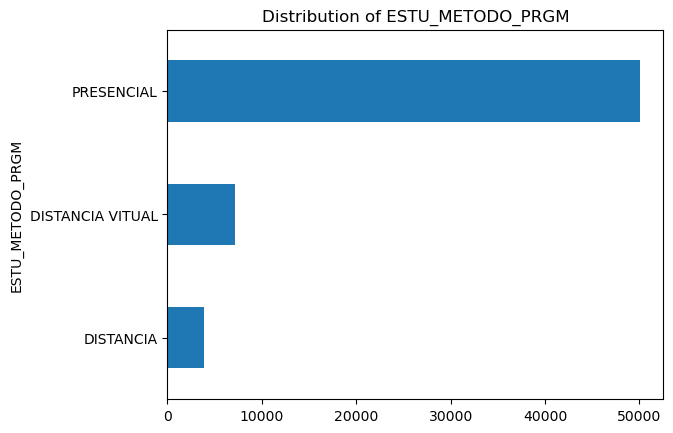


------------------------------------



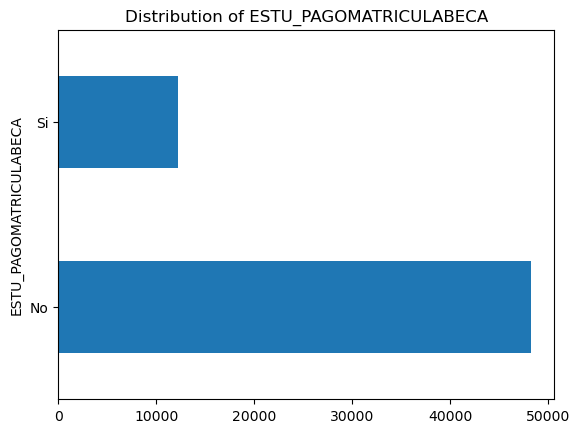


------------------------------------



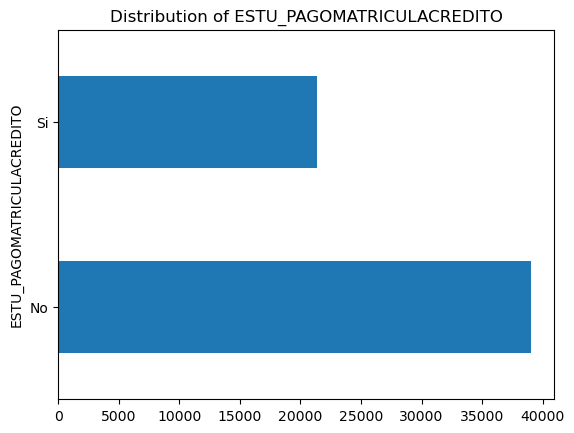


------------------------------------



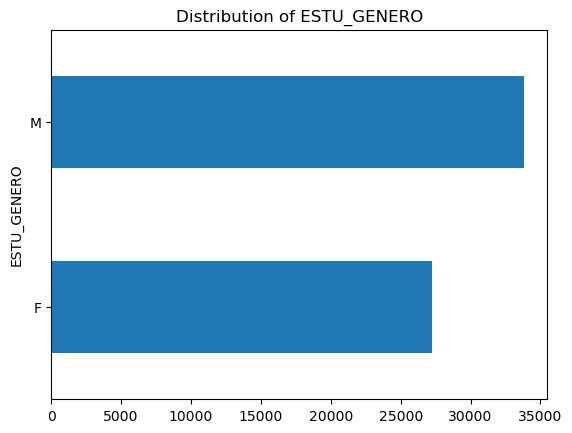


------------------------------------



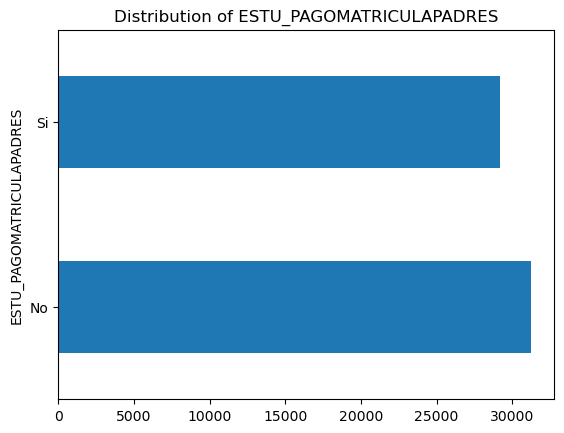


------------------------------------



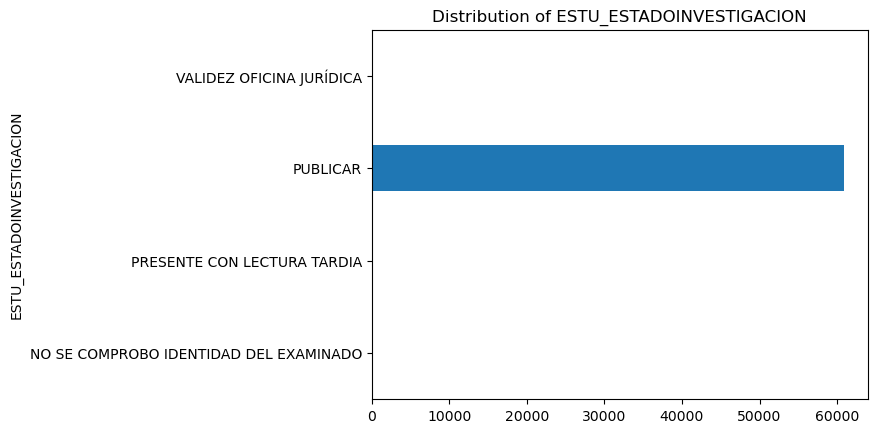


------------------------------------



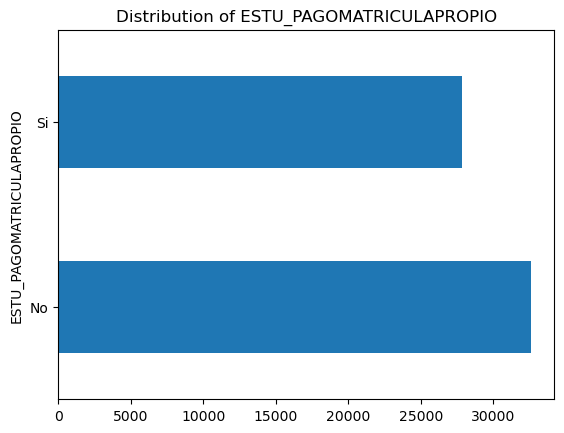


------------------------------------



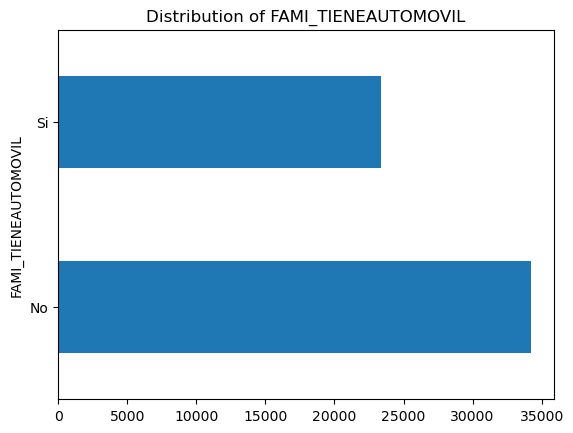


------------------------------------



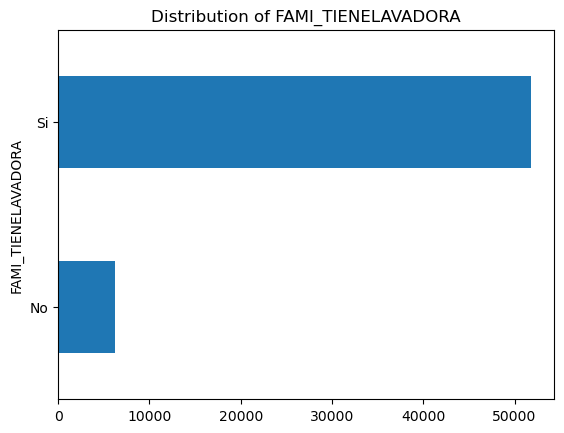


------------------------------------



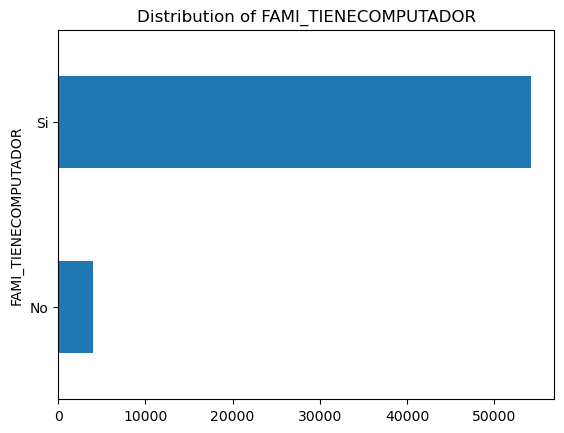


------------------------------------



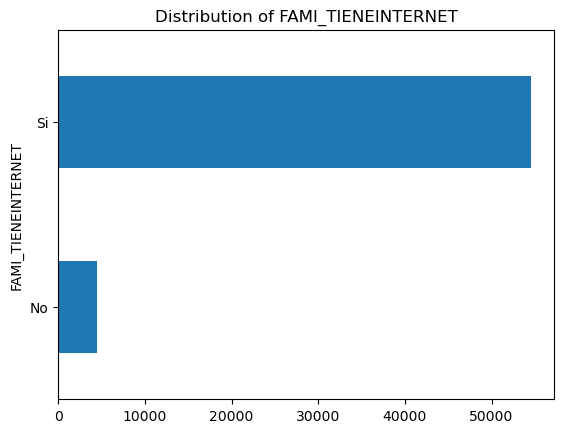


------------------------------------



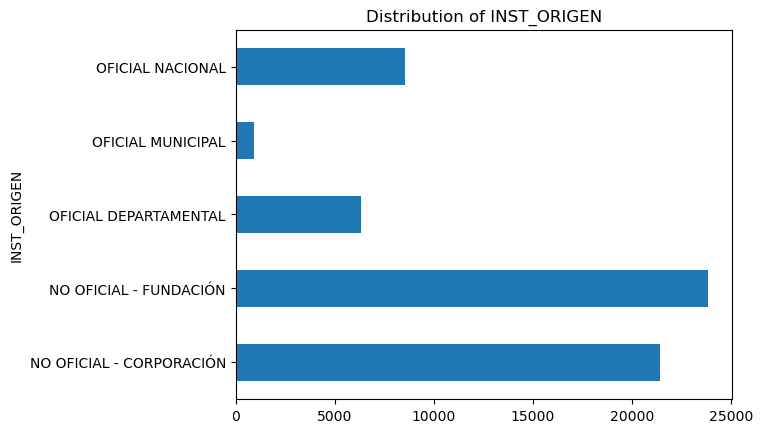


------------------------------------



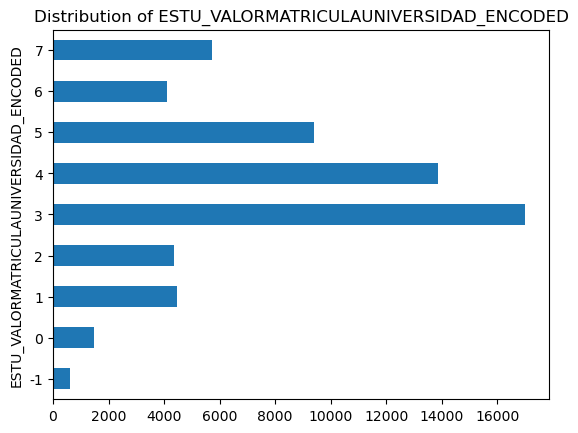


------------------------------------



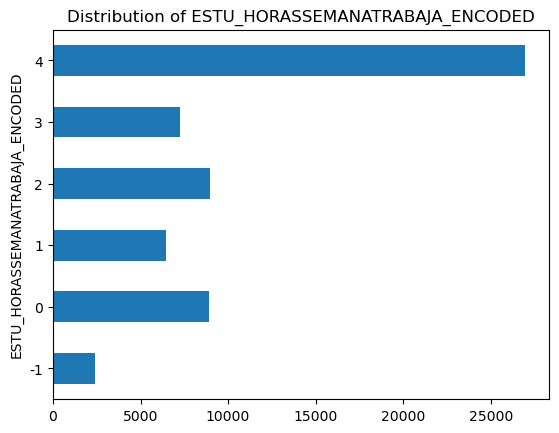


------------------------------------



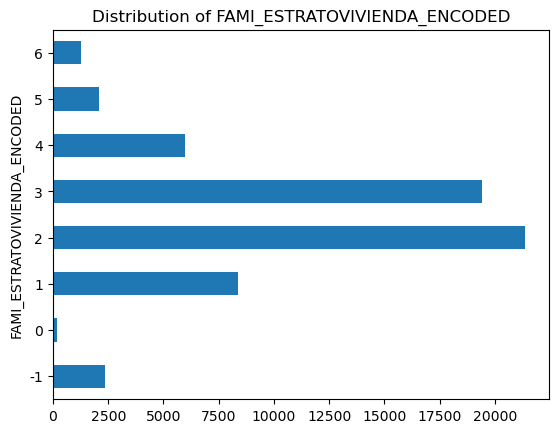


------------------------------------



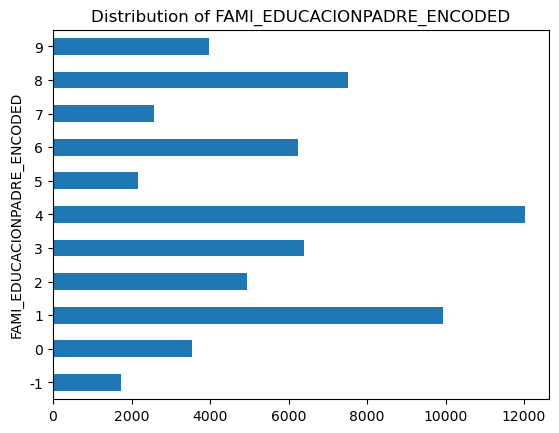


------------------------------------



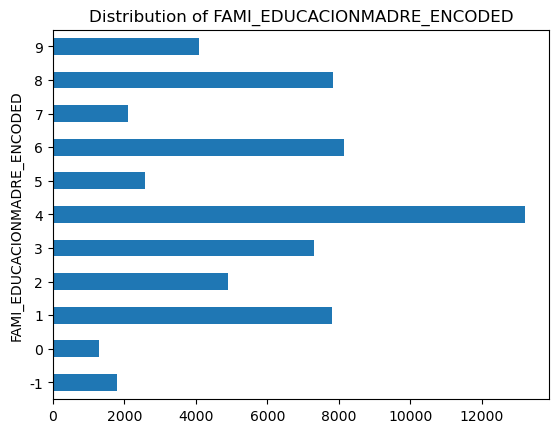

In [18]:
# Horizontal bar plot for cateogorical features
for i in list(data.columns):
    if i in categorical_features or i in ordinal_features:
        print('\n------------------------------------\n')
        data.groupby(i)[target[0]].count().plot(kind = 'barh' , title = 'Distribution of ' + i)
        plt.show()

# **3. Ingeniería de características**
En esta sección se aplican las transformaciones a las variables, así como la aplicación de diferentes técnicas para el mejoramiento del desempeño de los modelos

In [19]:
# Aplicar one hot encoding a las variables categóricas
numeric_scaler = MinMaxScaler()
cat_encoder = OrdinalEncoder()
# Definir una base con las variables que son categoricas pero no se necesitan hacer one hot encoding
categorical_no_encoding = ['ESTU_COD_RESIDE_DEPTO',
                             'ESTU_COD_DEPTO_PRESENTACION',
                             'INST_COD_INSTITUCION']
categorical_yes_encoding = [i for i in categorical_features if i not in categorical_no_encoding]
# Fit objects
#numeric_scaler.fit(data_1[numeric_features])
cat_encoder.fit(data[categorical_yes_encoding])
# Transformar la información
#aux_numeric = pd.DataFrame(numeric_scaler.transform(data_1[numeric_features]) , columns = data_1[numeric_features].columns.tolist())
#aux_categorical = pd.DataFrame.sparse.from_spmatrix(cat_encoder.transform(data[categorical_features]) , columns = cat_encoder.get_feature_names_out().tolist())
aux_categorical = pd.DataFrame(cat_encoder.transform(data[categorical_yes_encoding]) , columns = categorical_yes_encoding)
# Concatenar la información
data_2 = pd.concat([aux_categorical.reset_index(drop = True),
                    data[ordinal_features].reset_index(drop = True),
                    data[categorical_no_encoding].reset_index(drop = True),
                    data[target].reset_index(drop = True)] , axis = 1)
# Definir los tipos de datos para las variables
for i in data_2.columns.tolist():
    print('-' * 25)
    print(i)
    if i in numeric_features or i in target:
        data_2[i] = data_2[i].fillna(-1).astype(float)
        print('Variable' , i , 'converdita a float')
    if i in ordinal_features or i in categorical_features:
        data_2[i] = data_2[i].fillna(-1).astype(int)
        print('Variable' , i , 'convertida a int')
data_2

-------------------------
INST_CARACTER_ACADEMICO
Variable INST_CARACTER_ACADEMICO convertida a int
-------------------------
ESTU_METODO_PRGM
Variable ESTU_METODO_PRGM convertida a int
-------------------------
ESTU_PAGOMATRICULABECA
Variable ESTU_PAGOMATRICULABECA convertida a int
-------------------------
ESTU_PAGOMATRICULACREDITO
Variable ESTU_PAGOMATRICULACREDITO convertida a int
-------------------------
ESTU_GENERO
Variable ESTU_GENERO convertida a int
-------------------------
ESTU_PAGOMATRICULAPADRES
Variable ESTU_PAGOMATRICULAPADRES convertida a int
-------------------------
ESTU_ESTADOINVESTIGACION
Variable ESTU_ESTADOINVESTIGACION convertida a int
-------------------------
ESTU_PAGOMATRICULAPROPIO
Variable ESTU_PAGOMATRICULAPROPIO convertida a int
-------------------------
FAMI_TIENEAUTOMOVIL
Variable FAMI_TIENEAUTOMOVIL convertida a int
-------------------------
FAMI_TIENELAVADORA
Variable FAMI_TIENELAVADORA convertida a int
-------------------------
FAMI_TIENECOMPUTADOR
V

,INST_CARACTER_ACADEMICO,ESTU_METODO_PRGM,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_GENERO,ESTU_PAGOMATRICULAPADRES,ESTU_ESTADOINVESTIGACION,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENEAUTOMOVIL,FAMI_TIENELAVADORA,...,FAMI_EDUCACIONMADRE_ENCODED,ESTU_COD_RESIDE_DEPTO,ESTU_COD_DEPTO_PRESENTACION,INST_COD_INSTITUCION,PUNTAJE_GLOBAL,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_INGLES_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT
0,3,2,0,0,1,1,2,1,1,1,...,3,76,76,1805,180.2,193.0,153.0,195.0,178.0,182.0
1,3,2,1,1,1,0,2,0,0,1,...,3,66,66,2711,160.6,180.0,146.0,170.0,158.0,149.0
2,3,2,0,0,0,1,2,1,1,1,...,3,11,11,5802,147.2,145.0,140.0,127.0,146.0,178.0
3,3,2,0,0,0,1,2,0,-1,-1,...,-1,5,5,2813,174.6,186.0,148.0,214.0,190.0,135.0
4,3,2,1,0,0,1,2,0,0,1,...,8,11,11,1813,211.8,217.0,199.0,209.0,217.0,217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61016,3,2,0,1,1,1,2,0,0,1,...,8,11,11,1709,171.6,203.0,128.0,186.0,189.0,152.0
61017,1,1,1,1,0,0,2,1,0,1,...,0,76,76,2725,117.2,137.0,0.0,141.0,145.0,163.0
61018,1,2,0,0,1,1,2,1,1,1,...,9,41,11,2828,153.8,162.0,133.0,168.0,128.0,178.0
61019,1,1,0,0,0,0,2,1,0,1,...,1,25,25,2725,107.6,107.0,107.0,120.0,77.0,127.0


# **2. Pipelines y Entrenamiento**

In [111]:
# Generate all posible combinations of steps
POSIBLE_VALUES = {'Imputation' : [SimpleImputer(strategy = 'mean'),
                                  KNNImputer()],
                  'Seleccion_Variables' : [SelectKBest(score_func=f_regression, k=10),
                                           SelectFromModel(estimator=AdaBoostRegressor()),
                                           VarianceThreshold(threshold=0.1),
                                           SelectKBest(score_func=mutual_info_regression, k=10),
                                          'passthrough'],
                 'Model' : [ExtraTreesRegressor(),
                            ExtraTreeRegressor(),
                            AdaBoostRegressor(),
                            XGBRegressor(),
                            BaggingRegressor(),
                            DecisionTreeRegressor(),
                            CatBoostRegressor(logging_level = 'Silent'),
                            LGBMRegressor(verbosity=-1),
                            HistGradientBoostingRegressor(),
                            MLPRegressor(hidden_layer_sizes = (512 , 10))]}

num_combinations = len(list(product(*POSIBLE_VALUES.values())))
all_combinations = [
    {key: value for key, value in zip(POSIBLE_VALUES.keys(), combo)}
    for combo in product(*POSIBLE_VALUES.values())]
print('Total Combinations:' , num_combinations)

Total Combinations: 100


## **2.1 Puntaje Global**

In [107]:
aux_target = target[0]
aux_target

'PUNTAJE_GLOBAL'

In [112]:
# Seleccionar la combinación de opciones usando algoritmos genéticos
X = data_2.drop(columns = target)
Y = data_2[aux_target]
print('X.shape' , X.shape)
print('Y.shape' , Y.shape)
# Definir la función de fitness
def evaluate(individual):

    # Crear pipeline con los componentes seleccionados
    steps = [
        ('imputer', POSIBLE_VALUES['Imputation'][individual[0]]),
        ('feature_selection' , POSIBLE_VALUES['Seleccion_Variables'][individual[1]]),
        ('regressor', POSIBLE_VALUES['Model'][individual[2]])
    ]
    
    pipeline = Pipeline(steps)
    
    # Entrenar y evaluar con MAE
    scores = cross_val_score(pipeline, X, Y, cv = 3, scoring='neg_mean_absolute_error')
    return np.mean(scores) * -1,

# Create the genetic algorithm's toolbox
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_imp", random.randint, 0, len(POSIBLE_VALUES['Imputation']) - 1)
toolbox.register("attr_feature_selector", random.randint, 0, len(POSIBLE_VALUES['Seleccion_Variables']) - 1)
toolbox.register("attr_model", random.randint, 0, len(POSIBLE_VALUES['Model']) - 1)

# Add the seed as a fifth attribute
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_imp, toolbox.attr_feature_selector, toolbox.attr_model), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=[0]*3, up=[len(POSIBLE_VALUES['Imputation']) - 1,
                                                               len(POSIBLE_VALUES['Seleccion_Variables']) - 1,
                                                               len(POSIBLE_VALUES['Model']) - 1],
                indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm
def genetic_algorithm(n_gen=5, pop_size=10, cxpb=0.5, mutpb=0.2):
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=n_gen,
                                       stats=stats, halloffame=hof, verbose=True)
    
    return pop, hof, logbook

# Execute the genetic algorithm
population, hall_of_fame, logbook = genetic_algorithm()

# Display the best individual found
best_individual = hall_of_fame[0]
print("Best individual is:", best_individual)
print('Best selection is:\n' ,
      POSIBLE_VALUES['Imputation'][best_individual[0]] , '\n' ,
      POSIBLE_VALUES['Seleccion_Variables'][best_individual[1]] , '\n' ,
      POSIBLE_VALUES['Model'][best_individual[2]])
print("Mejor MAE:", evaluate(best_individual))

X.shape (61021, 21)
Y.shape (61021,)
gen	nevals	avg    	std     	min    	max    
0  	10    	16.2896	0.946368	15.3997	18.1848
1  	5     	15.9371	0.831266	15.3997	17.6584
2  	8     	15.5025	0.12435 	15.3997	15.7453
3  	4     	15.4193	0.0534484	15.3997	15.5789
4  	6     	15.3997	1.77636e-15	15.3997	15.3997
5  	8     	15.6481	0.745131   	15.3997	17.8835
Best individual is: [1, 2, 6]
Best selection is:
 KNNImputer() 
 VarianceThreshold(threshold=0.1) 
Mejor MAE: (15.399699030035789,)


In [116]:
# Crear un pipeline con la mejor seleccion  
mejor_pipeline = make_pipeline(POSIBLE_VALUES['Imputation'][best_individual[0]],
                          POSIBLE_VALUES['Seleccion_Variables'][best_individual[1]],
                          POSIBLE_VALUES['Model'][best_individual[2]])
mejor_pipeline.named_steps

{'knnimputer': KNNImputer(),
 'variancethreshold': VarianceThreshold(threshold=0.1),
 'catboostregressor': <catboost.core.CatBoostRegressor at 0x15f85fd73d0>}

In [120]:
# Definir los parámetros a optimizar
parametros_optimizar = {'knnimputer__n_neighbors' : [5 , 50, 100  , 500 , 1000],
                       'variancethreshold__threshold' : [0.1 , 0.25 , 0.5],
                       'catboostregressor__depth' : [6 , 8 , 10],
                       'catboostregressor__learning_rate' : [0.01 , 0.05 , 0.1]}

# Crear el grid search para realizar la búsqueda de hyperparametros
grid_search = GridSearchCV(mejor_pipeline,
                          param_grid = parametros_optimizar,
                          cv = 5,
                          verbose = 10,
                          scoring = 'neg_mean_absolute_error')
grid_search.fit(X , Y)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5; 1/135] START catboostregressor__depth=6, catboostregressor__learning_rate=0.01, knnimputer__n_neighbors=5, variancethreshold__threshold=0.1
[CV 1/5; 1/135] END catboostregressor__depth=6, catboostregressor__learning_rate=0.01, knnimputer__n_neighbors=5, variancethreshold__threshold=0.1;, score=-15.113 total time=   6.6s
[CV 2/5; 1/135] START catboostregressor__depth=6, catboostregressor__learning_rate=0.01, knnimputer__n_neighbors=5, variancethreshold__threshold=0.1
[CV 2/5; 1/135] END catboostregressor__depth=6, catboostregressor__learning_rate=0.01, knnimputer__n_neighbors=5, variancethreshold__threshold=0.1;, score=-15.247 total time=   6.3s
[CV 3/5; 1/135] START catboostregressor__depth=6, catboostregressor__learning_rate=0.01, knnimputer__n_neighbors=5, variancethreshold__threshold=0.1
[CV 3/5; 1/135] END catboostregressor__depth=6, catboostregressor__learning_rate=0.01, knnimputer__n_neighbors=5, variancethre

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('variancethreshold',
                                        VarianceThreshold(threshold=0.1)),
                                       ('catboostregressor',
                                        <catboost.core.CatBoostRegressor object at 0x0000015F85FD73D0>)]),
             param_grid={'catboostregressor__depth': [6, 8, 10],
                         'catboostregressor__learning_rate': [0.01, 0.05, 0.1],
                         'knnimputer__n_neighbors': [5, 50, 100, 500, 1000],
                         'variancethreshold__threshold': [0.1, 0.25, 0.5]},
             scoring='neg_mean_absolute_error', verbose=10)

In [121]:
# Mostrar los resultados
print('Mejor modelo' , grid_search.best_estimator_)
print('Mejores parametros' , grid_search.best_params_)
print('Mejor MAE' , grid_search.best_score_)
pd.DataFrame(grid_search.cv_results_)

Mejor modelo Pipeline(steps=[('knnimputer', KNNImputer()),
                ('variancethreshold', VarianceThreshold(threshold=0.1)),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x000001615D559890>)])
Mejores parametros {'catboostregressor__depth': 6, 'catboostregressor__learning_rate': 0.05, 'knnimputer__n_neighbors': 5, 'variancethreshold__threshold': 0.1}
Mejor MAE -15.348889629862384


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_catboostregressor__depth,param_catboostregressor__learning_rate,param_knnimputer__n_neighbors,param_variancethreshold__threshold,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.390683,0.399109,0.010373,0.000489,6,0.01,5,0.1,"{'catboostregressor__depth': 6, 'catboostregre...",-15.113427,-15.247201,-15.583669,-15.373529,-16.776431,-15.618851,0.599164,66
1,5.969015,0.339674,0.009768,0.000396,6,0.01,5,0.25,"{'catboostregressor__depth': 6, 'catboostregre...",-15.233876,-15.314958,-15.677231,-15.483367,-16.900291,-15.721945,0.608485,101
2,5.728781,0.377688,0.009976,0.000631,6,0.01,5,0.5,"{'catboostregressor__depth': 6, 'catboostregre...",-15.315601,-15.380647,-15.727659,-15.550064,-16.964957,-15.787786,0.605736,116
3,6.221037,0.296144,0.009966,0.000015,6,0.01,50,0.1,"{'catboostregressor__depth': 6, 'catboostregre...",-15.113427,-15.247201,-15.583669,-15.373529,-16.776431,-15.618851,0.599164,66
4,5.795693,0.204670,0.009878,0.000492,6,0.01,50,0.25,"{'catboostregressor__depth': 6, 'catboostregre...",-15.233876,-15.314958,-15.677231,-15.483367,-16.900291,-15.721945,0.608485,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,15.044526,0.532818,0.033903,0.002525,10,0.1,500,0.25,"{'catboostregressor__depth': 10, 'catboostregr...",-15.495562,-15.574677,-15.841686,-15.746318,-17.200818,-15.971812,0.626541,126
131,13.415754,0.266725,0.034705,0.005113,10,0.1,500,0.5,"{'catboostregressor__depth': 10, 'catboostregr...",-15.562067,-15.529642,-15.925487,-15.767554,-17.295858,-16.016121,0.655828,131
132,16.008713,0.987762,0.035513,0.006479,10,0.1,1000,0.1,"{'catboostregressor__depth': 10, 'catboostregr...",-15.297258,-15.477398,-15.741487,-15.611781,-17.123109,-15.850206,0.653251,121
133,14.930365,0.417939,0.032530,0.002522,10,0.1,1000,0.25,"{'catboostregressor__depth': 10, 'catboostregr...",-15.495562,-15.574677,-15.841686,-15.746318,-17.200818,-15.971812,0.626541,126


In [133]:
# Guardar resultados
pd.DataFrame(grid_search.cv_results_).to_excel(r'..\results\Resultados_Grid_Search_V20240822.xlsx')

# Guardar el modelo optimizado
# Exportar el categorical encoder
with open(r'..\models\Pipeline_V20240822.pkl' , 'wb') as file:
    joblib.dump(grid_search , file)
print('Archivo Generado -->' , str(grid_search) , 'en ../models/Pipeline_V20240822.pkl')

Archivo Generado --> GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('variancethreshold',
                                        VarianceThreshold(threshold=0.1)),
                                       ('catboostregressor',
                                        <catboost.core.CatBoostRegressor object at 0x0000015F85FD73D0>)]),
             param_grid={'catboostregressor__depth': [6, 8, 10],
                         'catboostregressor__learning_rate': [0.01, 0.05, 0.1],
                         'knnimputer__n_neighbors': [5, 50, 100, 500, 1000],
                         'variancethreshold__threshold': [0.1, 0.25, 0.5]},
             scoring='neg_mean_absolute_error', verbose=10) en ../models/Pipeline_V20240822.pkl


# **3. Importancia de Variables y Análisis de Factores**

In [169]:
# Obtener el mejor modelo del grid search
mejor_modelo = grid_search.best_estimator_
feature_names = X.columns

# Aplicar las transformaciones sin el modelo final
X_transformed = mejor_modelo[:-1].transform(X)

# Filtrar los nombres de las características que no fueron eliminadas por VarianceThreshold
mask = mejor_modelo.named_steps['variancethreshold'].get_support()
selected_features = feature_names[mask].tolist()

# Ahora selected_features contiene los nombres de las variables que se utilizan en CatBoost
print('Variable Seleccionadas:', selected_features)

Variable Seleccionadas: ['INST_CARACTER_ACADEMICO', 'ESTU_METODO_PRGM', 'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO', 'ESTU_GENERO', 'ESTU_PAGOMATRICULAPADRES', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'INST_ORIGEN', 'ESTU_VALORMATRICULAUNIVERSIDAD_ENCODED', 'ESTU_HORASSEMANATRABAJA_ENCODED', 'FAMI_ESTRATOVIVIENDA_ENCODED', 'FAMI_EDUCACIONPADRE_ENCODED', 'FAMI_EDUCACIONMADRE_ENCODED', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_DEPTO_PRESENTACION', 'INST_COD_INSTITUCION']


Using 405 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

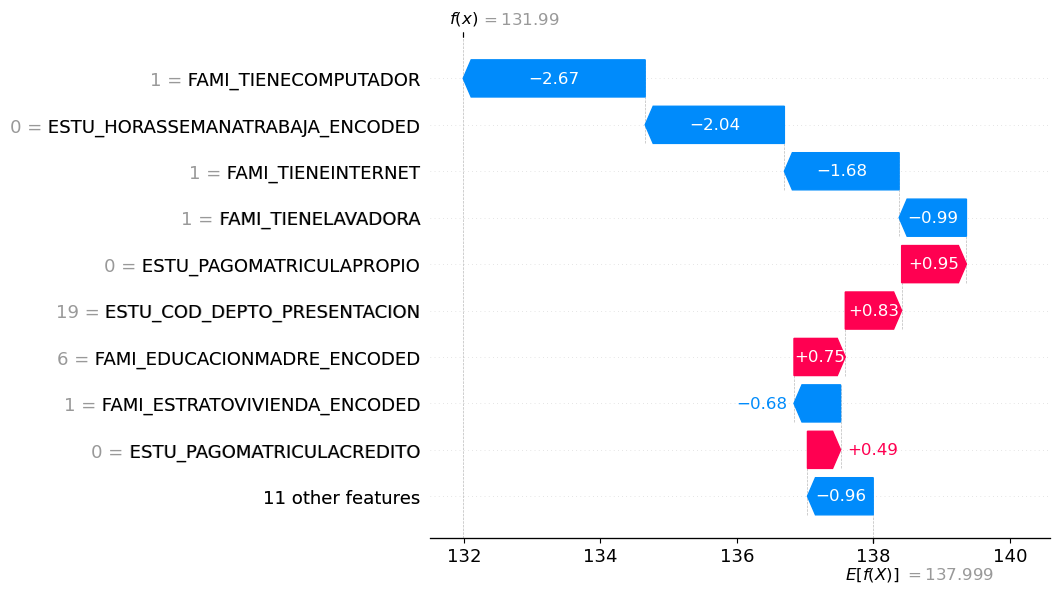

In [249]:
# Seleccionar para explicar sólo el dataset de los estudiantes de Popayán
ordinal_features = ['ESTU_VALORMATRICULAUNIVERSIDAD' , 'ESTU_HORASSEMANATRABAJA' , 'FAMI_ESTRATOVIVIENDA',
                   'FAMI_EDUCACIONPADRE' , 'FAMI_EDUCACIONMADRE']
dataset_popayan = pd.read_excel(r'..\data\Datos_Popayan.xlsx')
for i in ordinal_features:
    aux = codificador_ordinales[codificador_ordinales['COLUMNA'] == i]
    dataset_popayan[i + '_ENCODED'] = dataset_popayan[i].map(dict(aux[['VALOR_ACTUAL' , 'VALOR_CODIFICADO']].values))
# Actualizar las variables ordinales
ordinal_features = [i for i in dataset_popayan.columns.tolist() if '_ENCODED' in i]
# Aplicar el Ordinal Encoder
aux_categorical = pd.DataFrame(cat_encoder.transform(dataset_popayan[categorical_yes_encoding]) , columns = categorical_yes_encoding)
# Concatenar la información
data_3 = pd.concat([aux_categorical.reset_index(drop = True),
                    dataset_popayan[ordinal_features].reset_index(drop = True),
                    dataset_popayan[categorical_no_encoding].reset_index(drop = True),
                    dataset_popayan[target].reset_index(drop = True)] , axis = 1)
# Definir los tipos de datos para las variables
for i in data_3.columns.tolist():
    if i in numeric_features or i in target:
        data_3[i] = data_3[i].fillna(-1).astype(float)
    if i in ordinal_features or i in categorical_features:
        data_3[i] = data_3[i].fillna(-1).astype(int)

X_popayan = data_3.drop(columns = target)
        
# Transformar los datos con el pipeline       
X_transformed = mejor_modelo[:-1].transform(X_popayan)

# Obtener la explicación de SHAP
explainer = shap.KernelExplainer(mejor_modelo.named_steps['catboostregressor'].predict, X_transformed)

# Calcular los valores SHAP para la instancia seleccionada
fila = 200
shap_values = explainer(X_transformed[fila : fila + 1, :])

# Colocar los labels originales
explicacion = shap.Explanation(shap_values.values, 
                  shap_values.base_values, 
                  data = X_transformed, 
                  feature_names = selected_features)

# Crear el waterfall plot
shap.plots.waterfall(explicacion[0])

  0%|          | 0/405 [00:00<?, ?it/s]

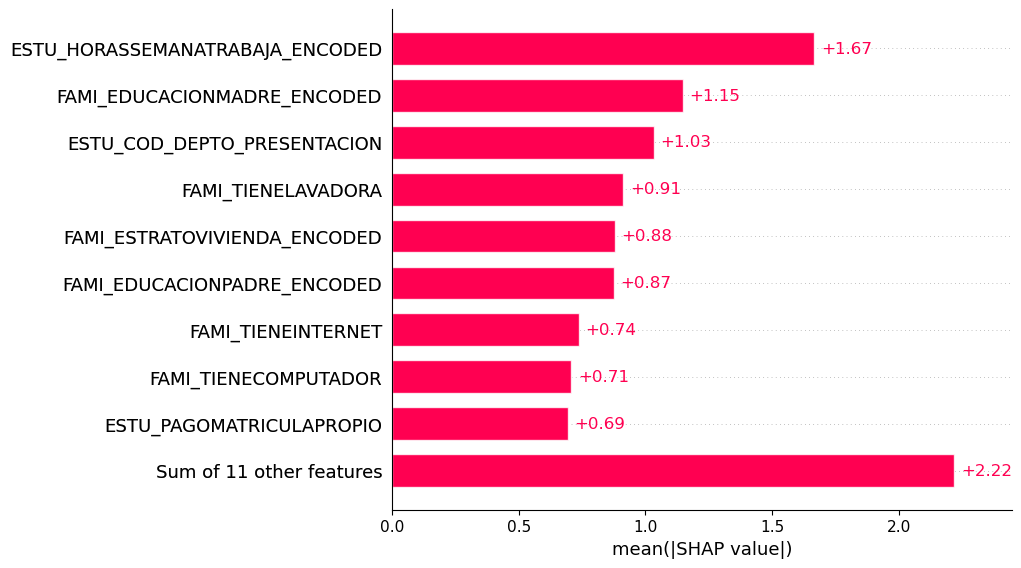

In [250]:
# Importancia generalizada de variables
X_popayan = data_3.drop(columns = target)
        
# Transformar los datos con el pipeline       
X_transformed = mejor_modelo[:-1].transform(X_popayan)

# Obtener la explicación de SHAP
explainer = shap.KernelExplainer(mejor_modelo.named_steps['catboostregressor'].predict, shap.sample(X_transformed , 50))

# Calcular los valores SHAP para la instancia seleccionada
shap_values = explainer(X_transformed)

# Colocar los labels originales
explicacion = shap.Explanation(shap_values.values, 
                  shap_values.base_values, 
                  data = X_transformed, 
                  feature_names = selected_features)
shap.plots.bar(explicacion)

In [251]:
# Exportar los valores shap
with open(r'..\models\shap_values.pkl', 'wb') as f:
    pickle.dump({'shap_values': shap_values.values, 'base_values': shap_values.base_values}, f)

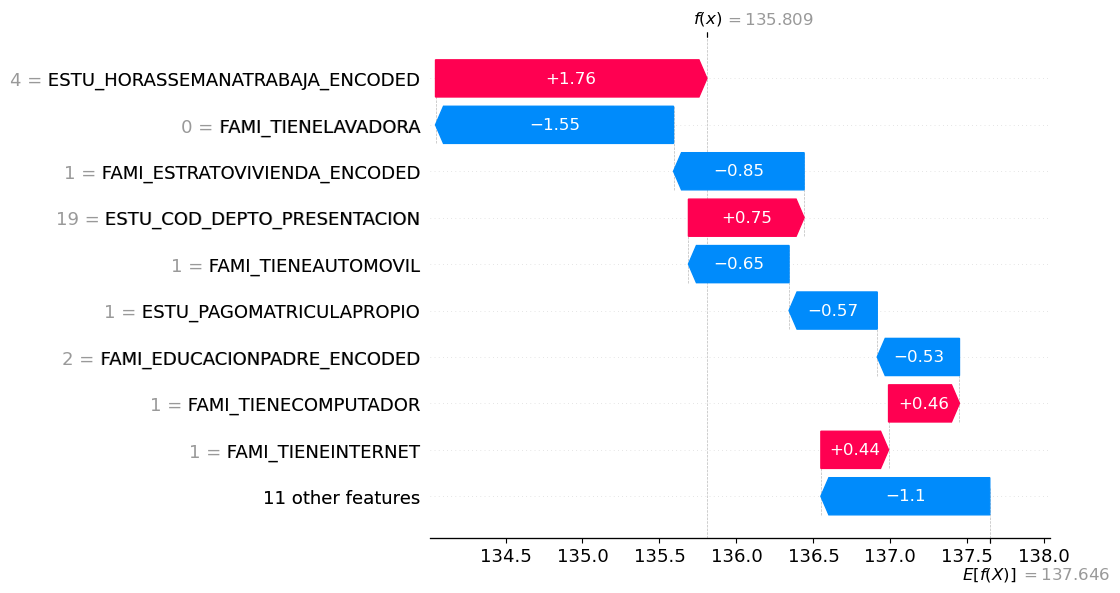

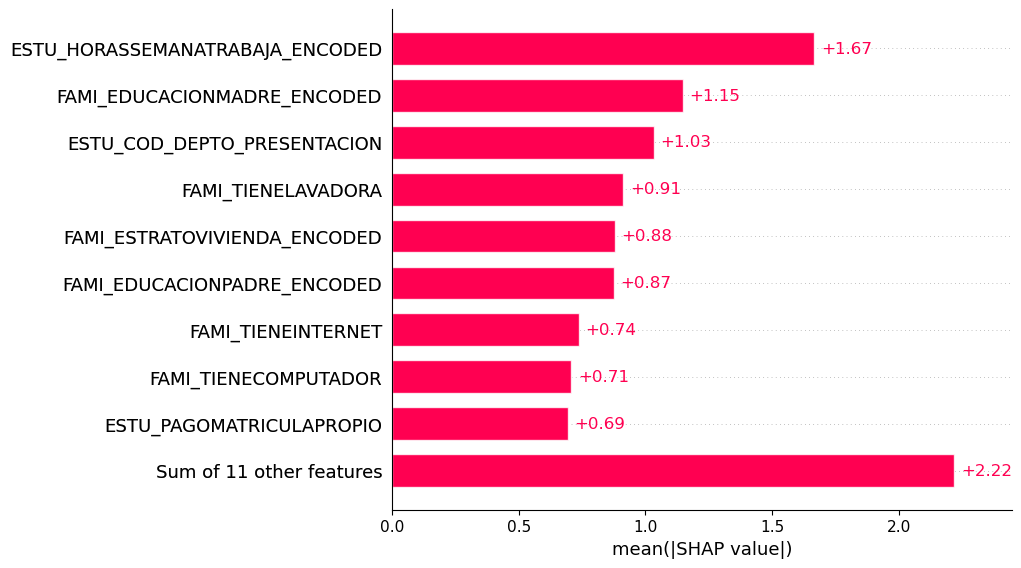

In [260]:
# Ejemplo de cómo cargarlos y volverlos a usar
with open(r'..\models\shap_values.pkl', 'rb') as f:
    data = pickle.load(f)
    loaded_shap_values = data['shap_values']
    loaded_base_values = data['base_values']

# Crear un SHAP value object usando los valores cargados
shap_values_object = shap.Explanation(loaded_shap_values,
                                      base_values=loaded_base_values,
                                      feature_names = selected_features,
                                     data = X_transformed)

# Realizar un waterfall plot para una instancia específica
shap.waterfall_plot(shap_values_object[10])
shap.plots.bar(shap_values_object)